<img align="center" src=" " height="1200" width="1200"> 


# Семинар 6: Регрессия - моя профессия!

Ура! Ура! Ура! Наконец-то пришло время поговорить о регрессии. Да не простой регрессии, а линейной! Это первый алгоритм машинного обучения, который мы обсудим. 

__Задача:__  как вы уже поняли по ручным задачам, мы будем прогнозировать сколько лайков поставит первокурсник под пабликом с мемами по его характеристикам. Число лайков - непрерывная переменная. Значит мы решаем задачу регрессии. 

In [1]:
import pandas as pd               # уже знакомый вам пакет для работы с таблицами
import numpy as np                # смутно знакомый вам пакет для работы с матрицами
import matplotlib.pyplot as plt   # уже смутно знакомый вам пакет для картинок :3
import seaborn as sns             # ещё один пакет для картинок 
plt.style.use('ggplot')     # правильный (очень красивый) стиль у графиков

%matplotlib inline

## 1. Метрики в задаче регрессии

Мы решаем задачу регрессии. Нужно прогнозировать действительные числа. Качество прогнозов, которые мы делаем нужно оценивать с помощью какой-то метрики. Давайте вспомним какие метрики используются при решении задачи регрессии. 

* MAE (mean absolute error), средняя абсолютная ошибка. Она вычисляется следующим образом: 

$$ MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|. $$

Если мы спрогнозировали, что поставят $20$ лайков, а на самом деле поставили $10$ лайков, мы ошиблись в прогнозах на $|10 - 20| = 10$ лайков. Средняя абсолютная ошибка - это среднее число лайков, на которое мы облажались. Один из минусов этой ошибки в том, что мы одинаково нелюбим перепрогноз и недопрогноз. В реальности цена этих двух ошибок может быть разной. Решить такую проблему можно немного модернезировав MAE и получив квантильную ошибку.

Например, можно задать кусочную функцию потерь. Она может помочь, например, в случае когда мы прогнозируем спрос на какой-то товар. Если мы завезли на склад слишком мало товара, потребителям не хватит его. Из-за того, что на товар будет наценка, а также из-за его нехватки, мы потеряем лояльность клиентов. Кривая потерь пойдёт под одним углом. Если нехватка будет небольшой, мы покроем её из запасов, потерь не будет. Если на складе будет избыток товара, мы потратим деньги на его хранение, кривая пойдёт под другим углом. Если избыток будет очень сильным, то возникнет просрочка. Кривая пойдёт под третьим углом.

<br>

<img align="center" src="nb3_1.png" width="600"> 

<br>


* MSE (mean squared error), средняя квадратичная ошибка. Она вычисляется как 

$$ MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2.$$

Смысл этой метрики в том, чтобы штрафовать за большие ошибки сильнее, чем за маленькие. Если мы ошиблись на 5 лайков, то в ошибку войдёт 25. Если мы ошиблись на 10 лайков, то в ошибку войдёт 100. Чем выше ошибка, тем сильнее потери. 

При этом эти числа: 25 и 100 это не лайки, а квадратные лайки. Каждое слагаемое внутри MSE возводится в квадрат и итоговая сумма получается не очень интерпретируемой. Для борьбы с этим можно взять из MSE квадратный корень. Тогда получится новая ошибка, RMSE. Из-за того, что более большие ошибки для нас страшнее, RMSE обычно получается больше, чем MAE. 

* Часто для нас принципиальным является не то, на сколько лайков мы ошиблись, а то на сколько процентов мы ошиблись. Метрика, которая отлавливает процентную ошибку, называется MAPE (mean absolute percentage error), средняя абсолютная процентная ошибка. 

$$
MAPE = \frac{1}{n} \sum_{i=1}^n \frac{|y_i - \hat{y}_i|}{y_i}
$$

Если вы предсказали  один, а в реальности было  десять - это не то же самое, что вы предсказали  тысяча, а в реальности было  тысяча  девять. С точки зрения МАЕ или MSE, это две совершенно одинаковые ошибки. А если вас интересует, в среднем на сколько процентов вы ошибаетесь, то это отражает МАРЕ.

* Последняя метрика, с которой нам нужно познакомиться, это коэффициент детерминации, $R^2$. Он отражает то, какую долю дисперсии объясняемой переменной мы объяснили с помощью нашей модели:

$$ R^2 =1- \frac{ \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{ \frac{1}{n}\sum_{i=1}^{n} (y_i - \bar{y}_i)^2} $$

Эту метрику очень сильно любят консалтеры и аудиторы, потому что только её они и знают. На самом деле в ней нет ничего хорошего. При добавлении в модель новых переменных она всегда растёт. У неё есть ещё несколько тонких математических недостатков, о которых вы можете узнать из книг.

Мы при решении задачи будем использовать MAE и RMSE. Давайте напишим небольшую функцию, с помощью которой нам будем немного удобнее выводить эти две метрики на экран.

In [2]:
from sklearn import metrics  # подгружаем метрики

# функция, которая считает метрики и выводит их на экран
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    pass

# пример:
y_test = [1,2,3,4]
y_pred = [1,1,1,1]
print_metrics(y_test,y_pred)

MAE: 1.5
RMSE: 1.8708286933869707


С тем какую задачу мы решаем и какие метрики используем определились. Давайте теперь посмотрим на данные.

## 2. Данные. Какие данные? 

Подгружаем табличку с лайками и смотрим на неё.

In [3]:
df = pd.read_csv('../data/vk_main.csv', sep='\t')   # подгружаем датасет
print('Размерность таблицы:', df.shape)             # shape показывает его размер
df.head()                                           # head выдаёт первые 5 строк

Размерность таблицы: (335, 96)


,city,country,first_name,home_town,last_name,likes_memes,uid,male_dummy,facebook_dummy,instagram_dummy,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
0,Москва,Россия,Артём,MOSCOW,Еркин,0,181029517,1,0,0,...,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,16.0,0.375000
1,NaN,Россия,Армен,NaN,Хачатрян,15,73703994,1,0,1,...,1.750000,4.0,1.0,0.571429,1.0,0.0,0.0,0.0,47.0,0.531915
2,Москва,Россия,Abbos,Бекабад,Akhmedov,11,467673028,1,0,0,...,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,26.0,0.500000
3,Москва,Россия,Адам,NaN,Триандафилиди,0,144910934,1,0,1,...,1.428571,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,83.0,0.518072
4,Алматы,Казахстан,Айжан,NaN,Саят,9,166045266,0,0,0,...,1.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,29.0,0.344828


__Сколько у нас всего наблюдений? Сколько в таблице переменных?__

### 2.1 Что прогнозируем?

Построим несколько картинок, чтобы немного лучше прочувствоват выборку. Посмотрим на то, какое распределение у целевой переменной (число лайков в паблике). 

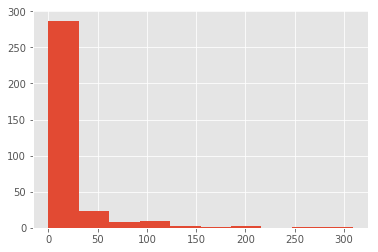

In [4]:
df.likes_memes.hist()

У распределения лайков есть проблема - очень длинный хвост. В выборке встречаются люди, которые слишком сильно любят мемы. Такие наблюдения называются __выбросами.__ С ними нужно бороться, иначе модель подстроится под них. Давайте сгладим распределение лайков, прологарифмировав его. На практике так делают довольно часто. Это позволяет немного уменьшить перепады и сгладить хвост.

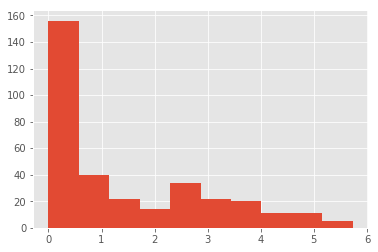

In [5]:
df['ln_likes_memes'] = df['likes_memes'].apply(lambda w: np.log(w) if w > 0 else -np.log(-1*w + 1))
df.ln_likes_memes.hist( )

Выглядит немного лучше. Мы попробуем построить регрессию для обоих таргетов и посмотреть что получится. __Обратите внимание, что в распределении есть два пика. Как бы вы это объяснили?__ 

### 2.2 Объясняющие переменные

Посмотрим на пропуски. На картинке ниже жёлтая клетка - это пропуск. Лиловая - это наблюдение. 

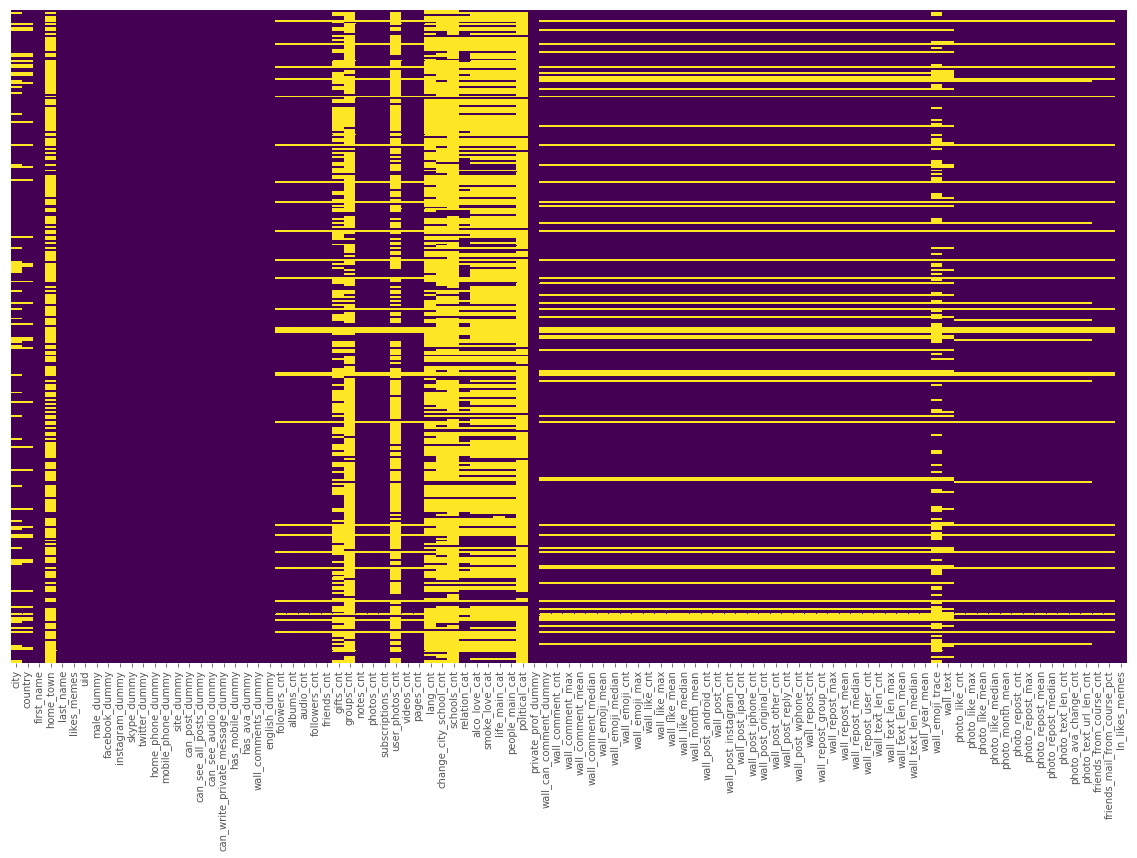

In [6]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Есть столбики с очень большим числом пропусков. Давайте выкинем из рассмотрения все данные, где пропусков больше $60$. Большая часть пропусков сопряжена с приватными страничками. Всего такиех страничек $56$. Давайте договоримся выбросить все переменные, где больше $56$ пропусков.

In [7]:
print('Переменных до выбрасывания:', df.shape)

isnull = df.isnull().sum()
df = df[isnull[isnull <= 56].index]

print('Переменных после выбрасывания:', df.shape)

Переменных до выбрасывания: (335, 97)
Переменных после выбрасывания: (335, 81)


Все переменные, которые есть в выборке делятся на несколько типов. Я специально постарался отразить их типы в названиях. Давайте посмотрим на то, какие это типы.

### Переменные счётчики

Количество друзей, количество подписчиков, число фоток - всё это счётчики!

In [8]:
variables_cnt = [item for item in df.columns if item[-3:] == 'cnt']
variables_cnt[:5]

['folowers_cnt', 'albums_cnt', 'audio_cnt', 'followers_cnt', 'friends_cnt']

Давайте посмотрим на распределения таких переменных. У них будет проблема. Очень многие из них будут подвержены наличиею выбросов. Более того, многие будут неинформативными. Например, переменная `photo_ava_change_cnt` абсолютно бесполезная, так как принимает только одно значение для всех ниблюдений.

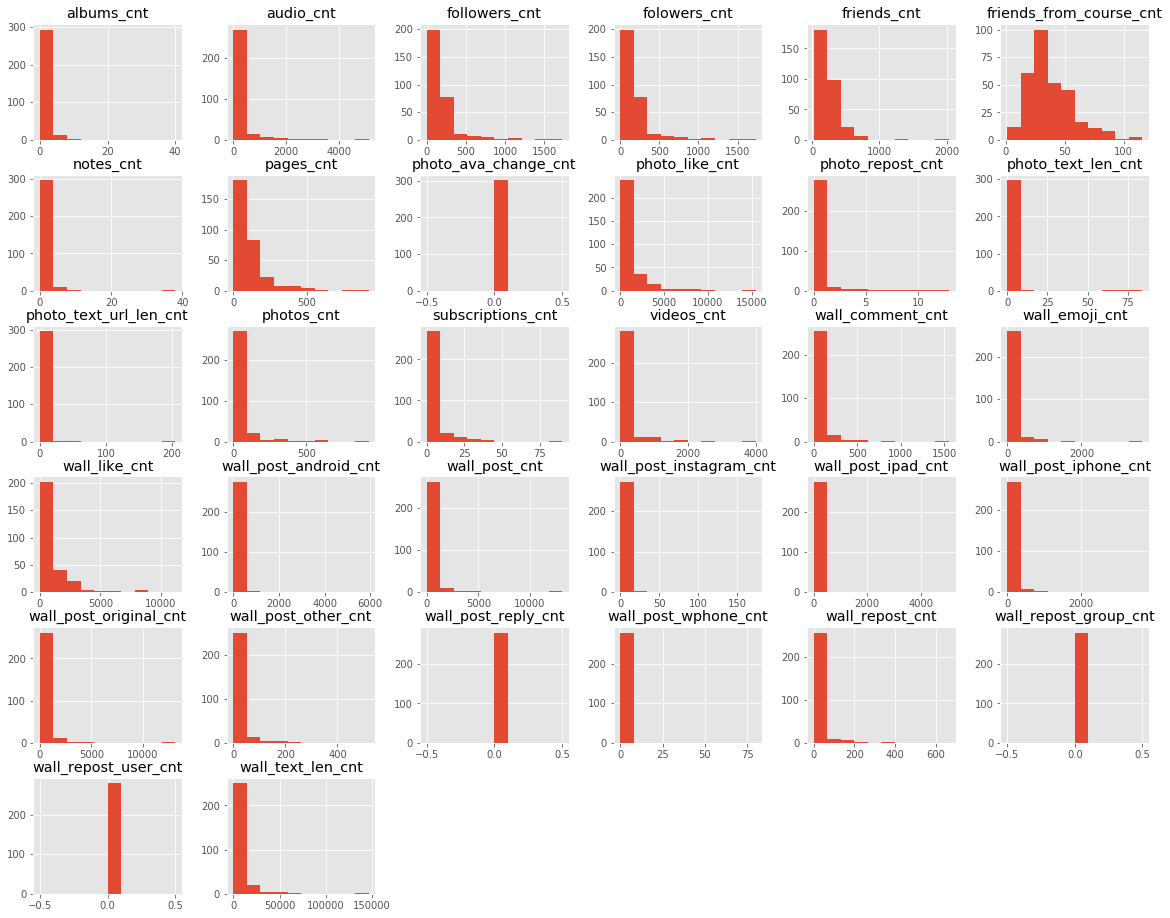

In [9]:
h = df[variables_cnt].hist(figsize=(20,16))

Выбрасываем все неинформативные переменные-счётчики. 

In [10]:
df['wall_repost_user_cnt'].unique()

array([ 0., nan])

In [11]:
print('Переменных-счётчиков до отбрасывания:', len(variables_cnt))

variables_cnt = [item for item in variables_cnt if len(df[item].unique()) > 10]

print('Переменных-счётчиков после отбрасывания:', len(variables_cnt))

Переменных-счётчиков до отбрасывания: 32
Переменных-счётчиков после отбрасывания: 25


Всё, что осталось прологарифмируем. 

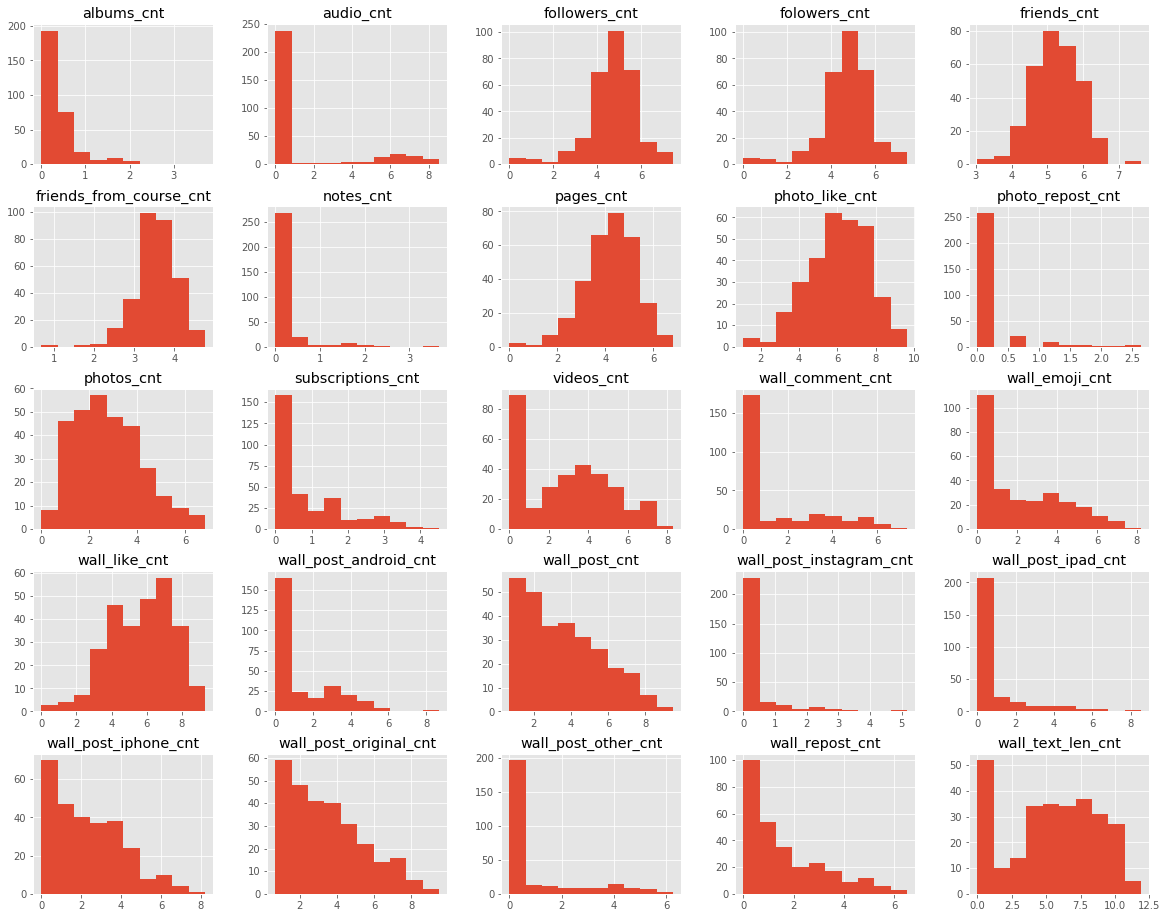

In [12]:
df[variables_cnt] = df[variables_cnt].apply(lambda w: np.log(w + 1))
h = df[variables_cnt].hist(figsize=(20,16))

### Дамми-переменные

Это переменные, которые принимают два значения: либо ноль, либо один.

In [13]:
variables_dummy = [item for item in df.columns if item[-5:] == 'dummy']
variables_dummy[:5]

['male_dummy',
 'facebook_dummy',
 'instagram_dummy',
 'skype_dummy',
 'twitter_dummy']

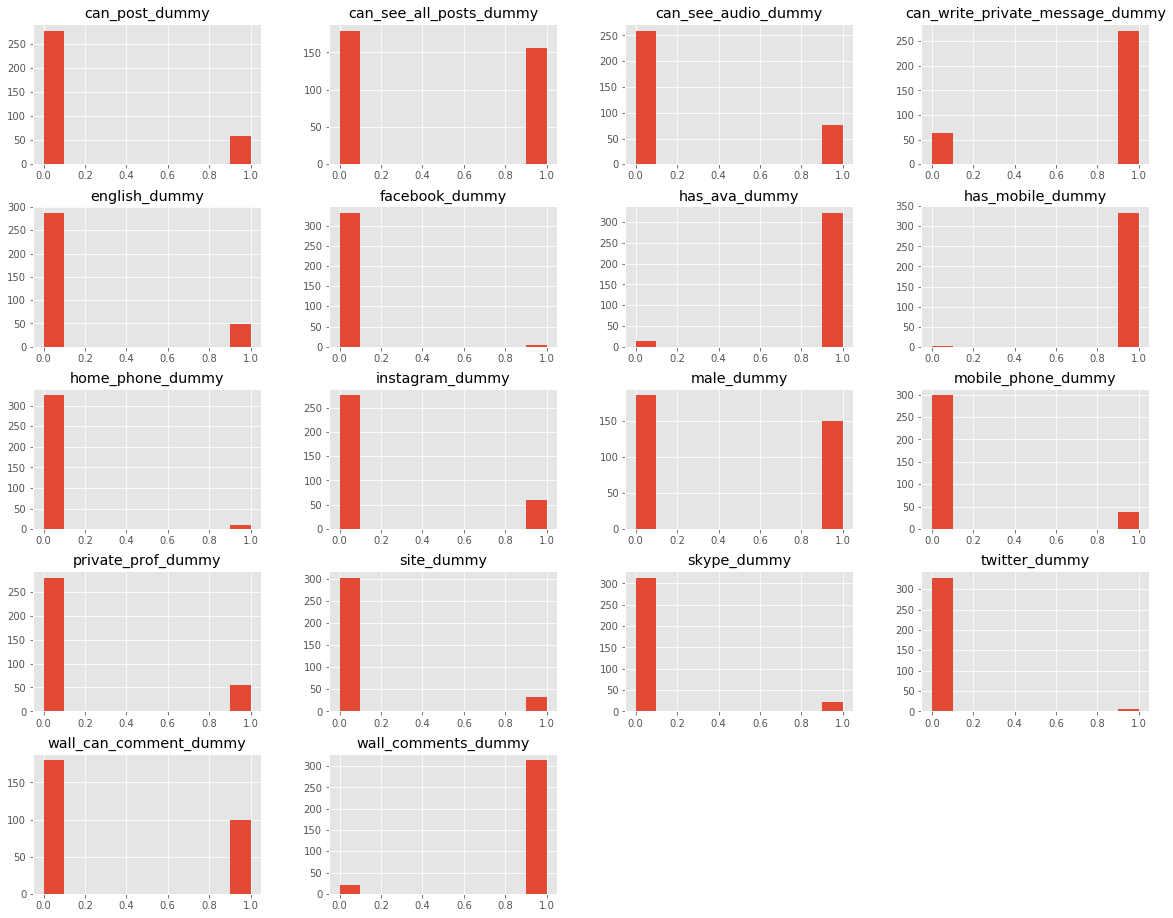

In [14]:
h = df[variables_dummy].hist(figsize=(20,16))

В целом с ними всё ок. 

### Категориальные переменные 

Название говорит само за себя. 

In [15]:
variables_cat = [item for item in df.columns if item[-3:] == 'cat']
variables_cat[:5]

[]

В данных их нет. Угадаете почему? Изначально то они там были... Куда мы их дели?

### Средние, медианы, максимумы и другие описательные статистики

Мы посчитали по каждому пользователю среднее число комментов на стене, среднее количество репостов, эмодзи и другие подобные характеристики. Также сделали с медианами и максимумами.

In [17]:
variables_median = [item for item in df.columns if item[-4:] == 'mean']
variables_median[:5]

['wall_comment_mean',
 'wall_emoji_mean',
 'wall_like_mean',
 'wall_month_mean',
 'wall_repost_mean']

In [19]:
variables_mean = [item for item in df.columns if item[-6:] == 'median']
variables_mean[:5]

['wall_comment_median',
 'wall_emoji_median',
 'wall_like_median',
 'wall_repost_median',
 'wall_text_len_median']

In [20]:
variables_max = [item for item in df.columns if item[-3:] == 'max']
variables_max[:5]

['wall_comment_max',
 'wall_emoji_max',
 'wall_like_max',
 'wall_repost_max',
 'wall_text_len_max']

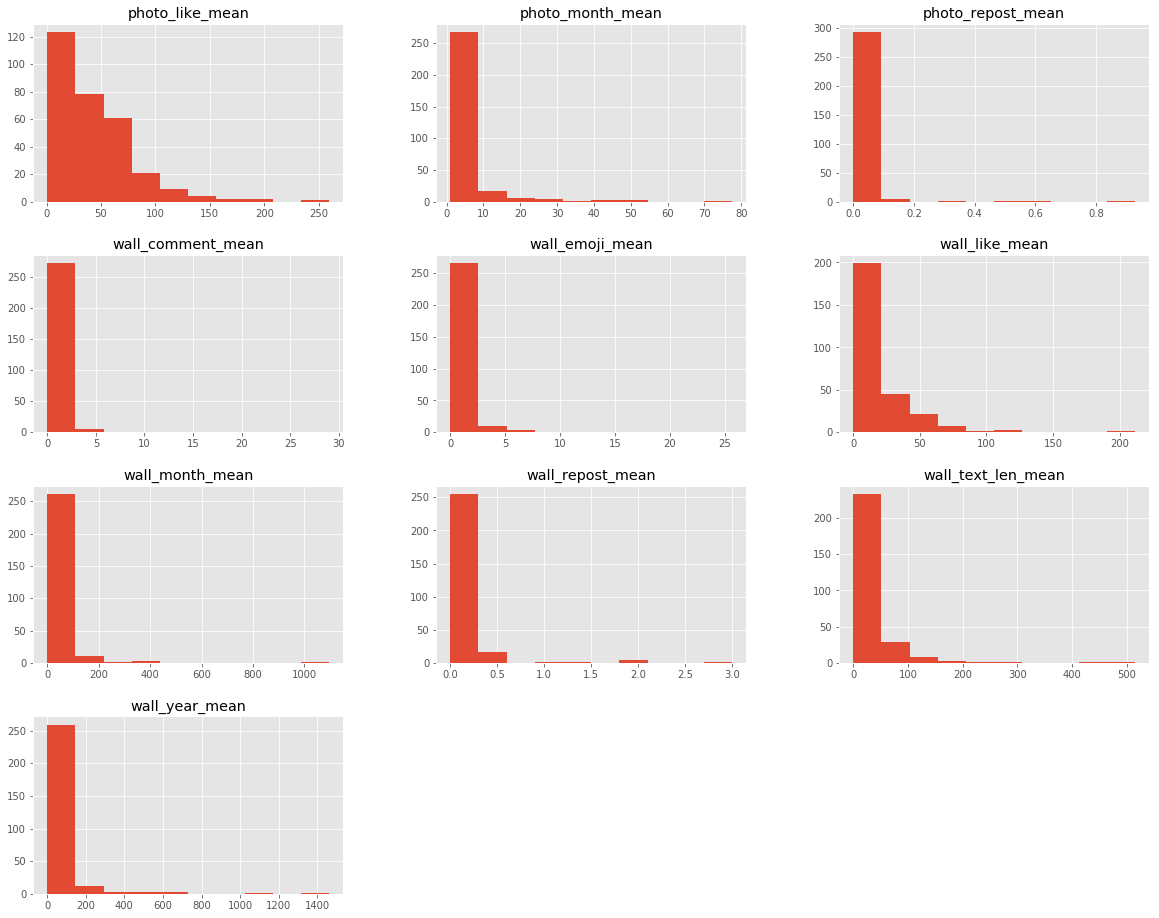

In [21]:
h = df[variables_median].hist(figsize=(20,16))

Давайте эти переменные тоже прологарифмируем.

In [22]:
variables_descriptive = variables_median + variables_mean + variables_max
df[variables_descriptive] =  df[variables_descriptive].apply(lambda w: np.log(w + 1))

Обратите внимание на следущую вещь: медианы и средние сильно дублируют друг-друга. Каждая по-своему пытается уловить одну и ту же информацию. Правда медиана это делает поустойчивее к выбросам, нежели среднее. Возможно, в итоговую модель имеет смысл брать только какие-нибудь одни из них (но это неточно).

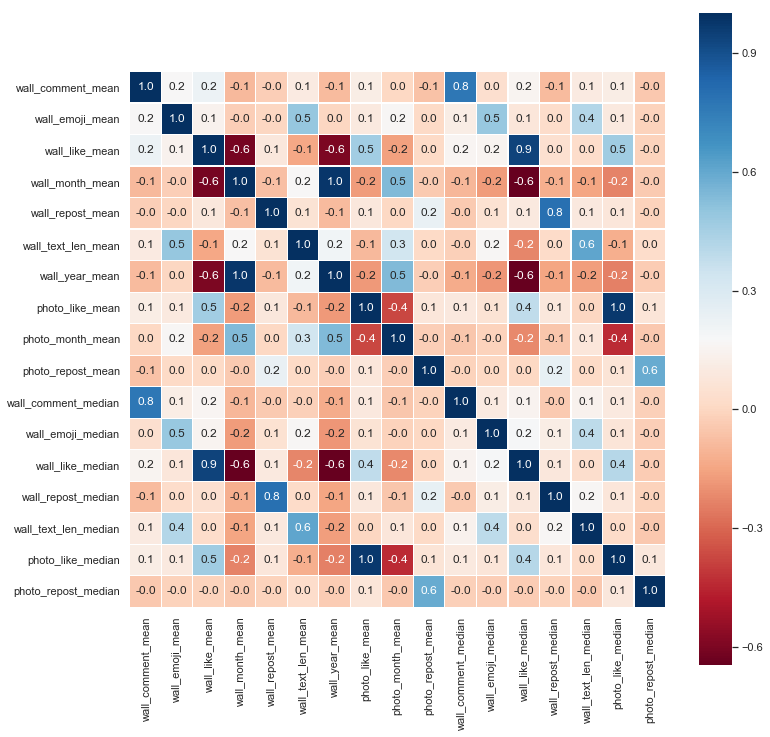

In [23]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(df[variables_median + variables_mean].corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

### Другие переменные 

В данных осталось ещё немного переменных. Давайте посмотрим что это. 

In [24]:
variables = df.columns

# мы выкинули неинформативные счётчики, придётся найти их заново
variables_cnt_reserve = [item for item in variables if item[-3:] == 'cnt']

variables_another = list(set(variables) - set(variables_cnt_reserve) - set(variables_dummy) - 
          set(variables_cat) - set(variables_descriptive))

df[variables_another].head()

,first_name,ln_likes_memes,last_name,likes_memes,friends_mail_from_course_pct,country,uid
0,Артём,-0.000000,Еркин,0,0.375000,Россия,181029517
1,Армен,2.708050,Хачатрян,15,0.531915,Россия,73703994
2,Abbos,2.397895,Akhmedov,11,0.500000,Россия,467673028
3,Адам,-0.000000,Триандафилиди,0,0.518072,Россия,144910934
4,Айжан,2.197225,Саят,9,0.344828,Казахстан,166045266


Тут, в основном, технические переменные, наш таргет, а также доля девушек среди всех друзей с курса. Девушек с курса возьмём в итоговые переменные, остальное выбросим.

Ещё разок давайте глянем на пропуски. 

In [25]:
# Списко полезных переменных =)
useful_variables = variables_cnt + variables_dummy + variables_descriptive + ['friends_mail_from_course_pct']

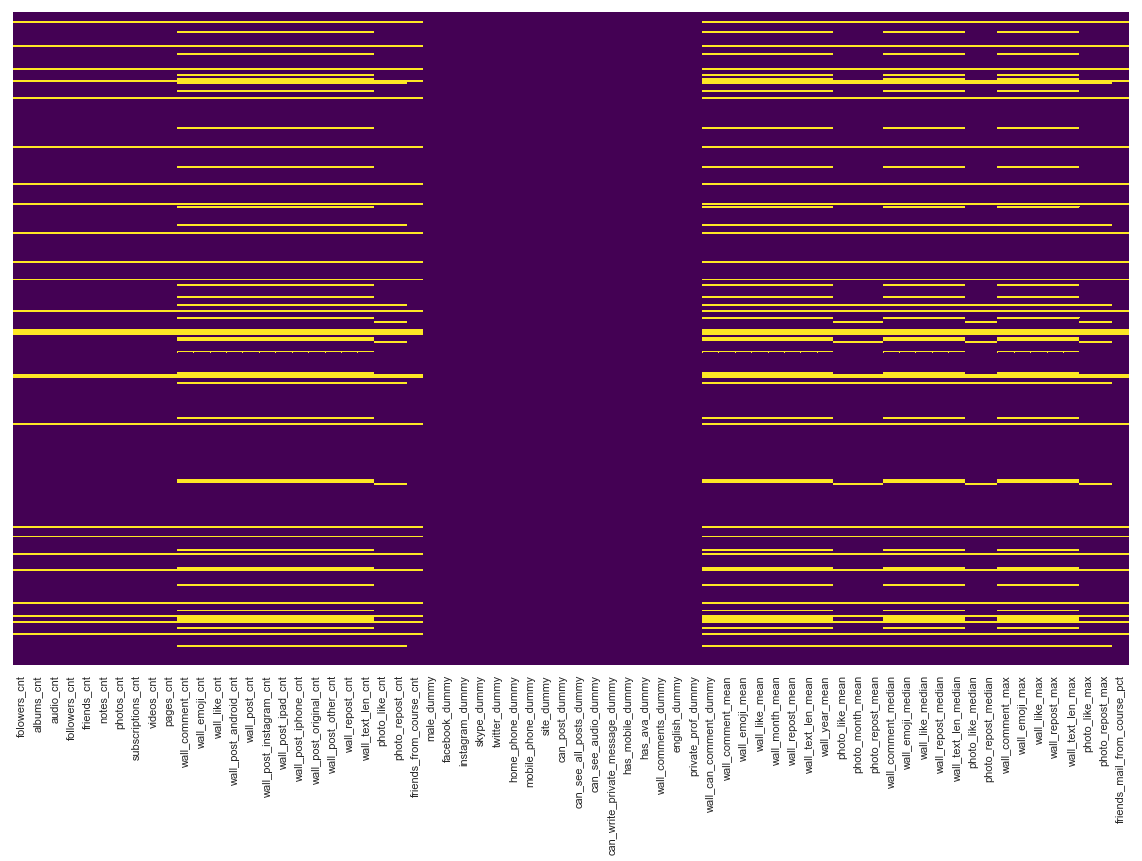

In [26]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df[useful_variables].isnull(), yticklabels=False, cbar=False, cmap='viridis')

Заполним их все нулями.

In [27]:
df[useful_variables] = df[useful_variables].fillna(0)

Данные, с которыми мы работаем, были довольно чистыми и предобработку пришлось делать не в особо больших количествах. Обычно предобработка идёт куда дольше и хардкорнее. Об этом мы обязательно поговорим отдельно. 

Всё! Переходим к моделированию. 

## 3. Пробуем построить модель

Разделим выборку на две части: тренировочную и тестовую. Вопрос: __зачем обычно это делают?__

In [59]:
from sklearn.model_selection import train_test_split  # функция для деления 

# делим в пропорции 80 к 20
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=42) 

Для удобства вытащим из таблицы матрицы.

In [60]:
# для удобства запишем в y то, что мы хотим спрогнозировать, а в X то, по чему мы это будем делать.
y_train = df_train['ln_likes_memes'].get_values()
y_test = df_test['ln_likes_memes'].get_values()

X_train = df_train[useful_variables].get_values()
X_test = df_test[useful_variables].get_values()

## 3.1 Наивный прогноз 

Шаг первый. Построим константный прогноз. Будем говорить, что каждый человек ставит под постом среднее количество лайков.

In [61]:
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им лайки
y_pred_naive[:5]

array([1.40436465, 1.40436465, 1.40436465, 1.40436465, 1.40436465])

In [62]:
# та самая функция, которую мы сделали в самом начале тетрадки
print_metrics(y_test, y_pred_naive)

MAE: 1.3478818795857703
RMSE: 1.5419236461979189


__Что означают эти числа? Почему так мало лайков ставят студенты?!__

## 3.2  Линейная регрессия

Пришло время построить линейную регрессию! Эта модель говорит, что число лайков формируется в результате суммирования тех характеристик, которыми обладает студент с какими-то весами

$$\hat{y} = \beta_0 + \beta_1 x_1 + ... \beta_n x_n.$$

Например, если мы оценили модель и у нас получилось, что 

$$ likes = 5 + 2 \cdot photo\_like\_cnt $$

то это означает, что среднее число лайков от студента равно $5$, но при этом каждый лайк под его фотку, прямо на страницу, заставляет его пойти посмотреть мемы и оставить на них два дополнительных лайка. 

Для того, чтобы подобрать коэффициенты обычно минимизируют MSE. Пусть компьютер сделает это за нас. Заставим вкалывать этот кусок железа во имя мемов!

In [63]:
from sklearn.linear_model import LinearRegression # подгрузили модель

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

Посмотрим на ошибку прогноза на тестовой выборке. По сравнению с наивным прогнозом она упала. Это хорошо. Значит наша регрессия уловила какую-то полезную информацию. Ошибка пока что падает не особо сильно. Давайте попробуем улучшить нашу модель.

In [64]:
print_metrics(y_test, y_pred_regr)

MAE: 1.2261004272905054
RMSE: 1.5353009757614668


## 3.3 Чистка переменных 

In [65]:
df_train.shape

(268, 81)

In [66]:
268/81

3.308641975308642

У нас в данных $270$ наблюдений и $81$ переменная. На то, чтобы оценить один коэффициент мы тратим $\frac{268}{81} \approx 3$ наблюдения. Это очень мало. Давайте попробуем отобрать только самые классные переменные. Для этого посчитаем корреляцию каждой переменной с таргетом. Возьмём только те, где корреляция большая.

In [67]:
corr_neg = df_train[useful_variables].corrwith(df_train['ln_likes_memes']).sort_values()
corr_neg[:10]

male_dummy                        -0.191419
mobile_phone_dummy                -0.143059
private_prof_dummy                -0.117873
home_phone_dummy                  -0.093994
twitter_dummy                     -0.081323
subscriptions_cnt                 -0.058777
can_write_private_message_dummy   -0.048310
photo_repost_cnt                  -0.041497
photo_repost_max                  -0.037914
wall_post_other_cnt               -0.031747
dtype: float64

In [68]:
corr_pos = df_train[useful_variables].corrwith(df_train['ln_likes_memes']).sort_values(ascending=False)
corr_pos[:10]

friends_from_course_cnt    0.191652
videos_cnt                 0.161514
photo_like_cnt             0.156200
pages_cnt                  0.151808
photo_like_max             0.137846
wall_text_len_mean         0.129302
photo_like_mean            0.127529
friends_cnt                0.126809
photos_cnt                 0.124521
photo_like_median          0.121658
dtype: float64

In [69]:
best_variables = list(corr_pos[:10].index) + list(corr_neg[:10].index)

In [70]:
# Забираем в выборку лучших из лучших 

X_train = df_train[best_variables].get_values()
X_test = df_test[best_variables].get_values()

In [71]:
X_train.shape

(268, 20)

In [72]:
from sklearn.linear_model import LinearRegression # подгрузили модель

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

print_metrics(y_test, y_pred_regr)

MAE: 1.2299601819885484
RMSE: 1.5221322005327116


Что мы видим? Видим, что ошибка при выкидывании кучи не очень важных переменных не изменилась. Судя по всему, все эти переменные не несли о числе лайков никакой информации. 

## 3.4 Меняем функцию для оптимизации 

При стрьительстве моделей выше мы пользовались классом `LinearRegression()`, он пытается минимизировать $MSE$. Давайте попробуем проминимизировать другую функцию потерь, более устойчивую к выбросам: некую модернизацию $MAE$. Для этого позовём новый класс, `HuberRegressor( )`.

In [74]:
from sklearn.linear_model import HuberRegressor

# Объявили модель
model_huber = HuberRegressor()

# Обучили модель на тренировочной выборке 
model_huber.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_huber.predict(X_test)

print_metrics(y_test, y_pred_regr)

MAE: 1.1898669838988916
RMSE: 1.5059405008951425


__ПАУ! ПАУ! ПАУ!__ Произошло улучшение качества прогноза! Мы молодцы! 

Давайте построим две красивые картиночки и на этом остановимся.

## 4. Картиночки и результаты

Первая картинка - важность коэффициентов в модели.

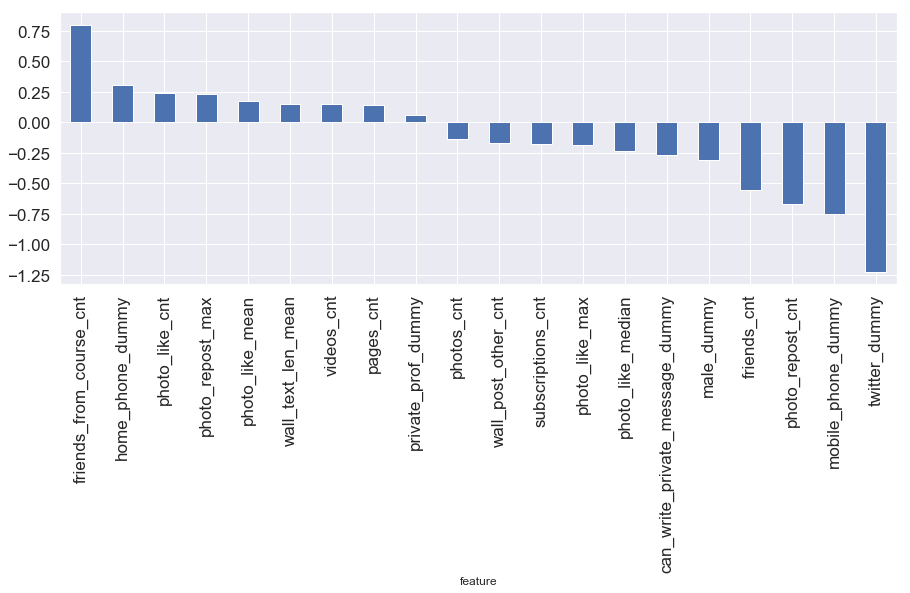

In [87]:
fig, ax = plt.subplots(figsize=(15,5))
featureImportance = pd.DataFrame({"feature": best_variables, 
                                  "importance": model_huber.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', fontsize=17);

Теперь давайте визуализируем прогнозы. По оси $x$ отложены рельные значения лайков, по оси $y$ отложены прогнозы. Если модель работает хорошо, прогноз должен совпадать с реальным значением и наши точки на обоих картинках должны выстроиться вдоль диагонали. Мы видим, что такого не происходит. Наша модель работает довольно плохо. Предсказывать количество лайков по характеристикам со странички в социальной сети у нас пока что не выходит...  __Но зато есть домашнее задание! И в нём, возможно, у вас получится это сделать хорошо.__

In [88]:
def plot_yreal_ypred(y_test, y_train, X_test, X_train, model, margin=0.3):
    """
        Рисует картинку для прогнозов
            modelt - модель 
            y_train, X_train - обучающая выборка
            y_test, X_test - тестовая выборка
            margin - граница рисунка 
    """
    
    plt.figure(figsize=(16,7))
    plt.subplot(121)
    plt.scatter(y_train, model.predict(X_train), color="red", alpha=0.1)
    plt.xlim(min(y_train) - margin, max(y_train) + margin)
    plt.ylim(min(y_train) - margin, max(y_train) + margin)
    plt.title('Train set', fontsize=20)
    plt.xlabel('Quality', fontsize=14)
    plt.ylabel('Estimated quality', fontsize=14)

    plt.subplot(122)
    plt.scatter(y_test, model.predict(X_test), color="red", alpha=0.1)
    plt.xlim(min(y_test) - margin, max(y_test) + margin)
    plt.ylim(min(y_test) - margin, max(y_test) + margin)
    plt.title('Test set', fontsize=20)
    plt.xlabel('Quality', fontsize=14)
    plt.ylabel('Estimated quality', fontsize=14)
    pass

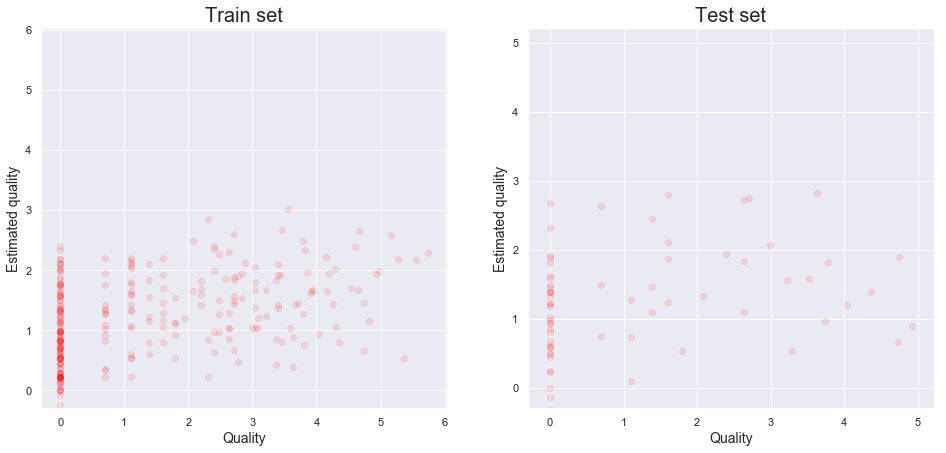

In [90]:
plot_yreal_ypred(y_test, y_train, X_test, X_train, model_huber)

## В дз: 

* __Подозрение:__ оч важны дамми-переменные. Странно, что наличие твиттера так сильно влияет на уменьшение лайков. Посмотрите как часто встречаются в выборке люди с твиттером. Это есть на дамми-гистограмме. Постройте её. Как думаете эта переменная правда важна? Почему? 

Попробуйте удалить из рассмотрения все дамми-переменные и оценить две регрессии: линейную и хубера. Какое у меоделей качество? Стало ли оно лучше? 

* Сформулируйте гипотезу о том, какие переменные стоит оставить или выкинуть из рассмотрения. Почему вы так считате? Оцените модель на подходящих на ваш взгляд переменных. Получилось ли улучшить качество прогнозирования? 

* Обратите внимание, что на картинке с прогнозами очень густой является область с нулевым числом лайков. Может ли быть проблема в том, что в данных есть особая нулевая точка, которую надо рассматривать отдельно и придумывать для неё свою модель? Попробуйте выкинуть из рассмотрения всех, кто поставил нулевое число лайков и построить модель только для положительного их количества. Для моделирования используйте список фичей, который вы придумали в предыдущем пункте. Дополнительно с помощью корреляции с таргетом отберите из этого списка только самые важные фичи.